<a href="https://colab.research.google.com/github/elluy-gabriel-p/Capstone_ML/blob/hapid/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install pillow


In [2]:
# Clone repository dari branch hapid
!git clone --branch hapid https://github.com/elluy-gabriel-p/Capstone_ML.git

# Pastikan dataset berhasil diunduh
!ls Capstone_ML/data/dataset_padang_food

# Path dataset untuk digunakan dalam model
DATASET_PATH = '/content/Capstone_ML/data/dataset_padang_food'


Cloning into 'Capstone_ML'...
remote: Enumerating objects: 1054, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 1054 (delta 24), reused 46 (delta 20), pack-reused 999 (from 1)
Receiving objects: 100% (1054/1054), 171.80 MiB | 25.78 MiB/s, done.
Resolving deltas: 100% (25/25), done.
ayam_goreng  daging_rendang   gulai_ikan     gulai_tunjang  telur_dadar
ayam_pop     dendeng_batokok  gulai_tambusu  telur_balado


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameter dataset
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data Augmentation dan Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load Data Training dan Validation
DATASET_PATH = '/content/Capstone_ML/data/dataset_padang_food'
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 799 images belonging to 9 classes.
Found 194 images belonging to 9 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 tanpa top layer
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Tambahkan layer custom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
EPOCHS = 10
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3325 - loss: 1.8824 - val_accuracy: 0.7784 - val_loss: 0.7092
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7817 - loss: 0.6891 - val_accuracy: 0.8351 - val_loss: 0.4689
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8799 - loss: 0.3879 - val_accuracy: 0.8711 - val_loss: 0.4249
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9270 - loss: 0.2850 - val_accuracy: 0.8247 - val_loss: 0.4591
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9483 - loss: 0.1717 - val_accuracy: 0.8557 - val_loss: 0.3672
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9572 - loss: 0.1641 - val_accuracy: 0.8608 - val_loss: 0.3769
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9720 - loss: 0.1278 - val_accuracy: 0.8866 - val_loss: 0.3542
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9906 - loss: 0.0781 - val_accuracy: 0.8763 - val_loss: 0.3552
Epo

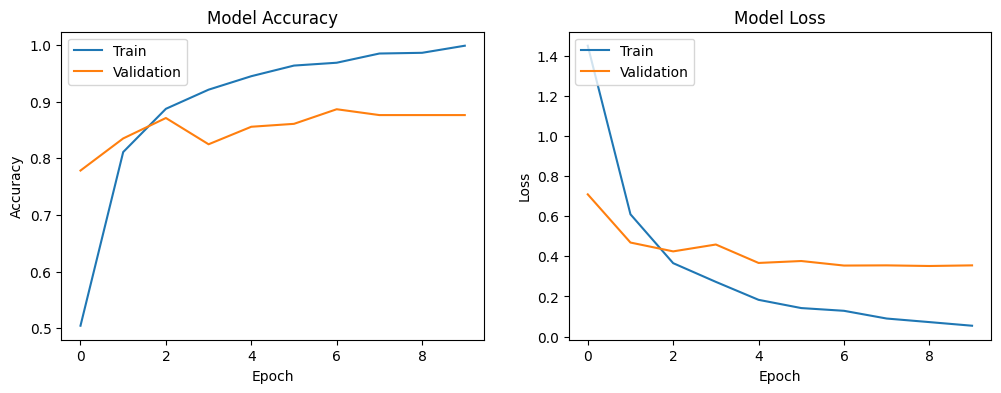

In [5]:
# Monitor Training Progress

import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [6]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Fungsi untuk prediksi dari file upload
def predict_uploaded_image(uploaded_file, model, class_indices):
    img = image.load_img(uploaded_file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_names = list(class_indices.keys())
    predicted_class = class_names[np.argmax(predictions)]

    return predicted_class

# Upload gambar dari user
uploaded = files.upload()  # Widget untuk mengunggah gambar

if uploaded:
    for file_name in uploaded.keys():
        print(f"Processing file: {file_name}")

        # Gunakan model yang telah dilatih
        class_indices = train_data.class_indices

        # Prediksi gambar yang diunggah
        predicted_food = predict_uploaded_image(file_name, model, class_indices)
        print(f"The predicted food is: {predicted_food}")


KeyboardInterrupt: 